In [51]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline

from speed_test import speed_test

In [52]:
df = pd.read_csv('bestsellers_with_categories.csv')

In [53]:
# simple example for speed testing
@speed_test
def inf(df):
    return df.info()
inf(df)
print('************************************************')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
Executing inf
Time Elapsed: 0.013319969177246094
************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [54]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [55]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [56]:
len(df[df['User Rating'] < 3.5])

1

In [57]:
df.groupby(['User Rating'])['Name'].count()

User Rating
3.3      1
3.6      1
3.8      2
3.9      3
4.0     14
4.1      6
4.2      8
4.3     25
4.4     38
4.5     60
4.6    105
4.7    108
4.8    127
4.9     52
Name: Name, dtype: int64

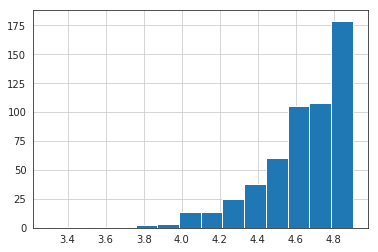

In [58]:
df['User Rating'].hist(bins=14)

In [59]:
df.groupby('Name')['User Rating'].mean().sort_values(ascending=False).head()

Name
Strange Planet (Strange Planet Series)                                                                                     4.9
Unfreedom of the Press                                                                                                     4.9
Little Blue Truck                                                                                                          4.9
Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)    4.9
The Wonderful Things You Will Be                                                                                           4.9
Name: User Rating, dtype: float64

In [60]:
df.groupby('Name')['User Rating'].count().sort_values(ascending=False).head()

Name
Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
Name: User Rating, dtype: int64

In [61]:
ratings = pd.DataFrame(df.groupby('Name')['User Rating'].mean())
ratings.head()

,User Rating
Name,
10-Day Green Smoothie Cleanse,4.7
11/22/63: A Novel,4.6
12 Rules for Life: An Antidote to Chaos,4.7
1984 (Signet Classics),4.7
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",4.8


In [62]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Name')['User Rating'].count())
ratings.head(10)

,User Rating,num of ratings
Name,,
10-Day Green Smoothie Cleanse,4.7,1
11/22/63: A Novel,4.6,1
12 Rules for Life: An Antidote to Chaos,4.7,1
1984 (Signet Classics),4.7,1
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",4.8,1
A Dance with Dragons (A Song of Ice and Fire),4.4,1
A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,4.7,1
A Gentleman in Moscow: A Novel,4.7,1
"A Higher Loyalty: Truth, Lies, and Leadership",4.7,1


In [63]:
ratings.groupby('num of ratings').count()

,User Rating
num of ratings,
1,255
2,55
3,15
4,8
5,11
6,2
7,2
8,1
9,1


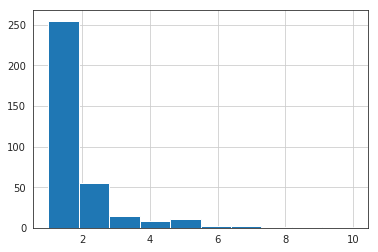

In [64]:
ratings['num of ratings'].hist(bins=10)

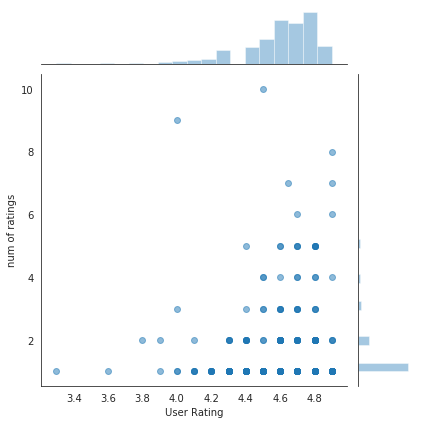

In [65]:
sns.jointplot(x='User Rating', y='num of ratings', data=ratings, alpha=0.5)

In [66]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [67]:
df['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [68]:
#book_user_rating = df.pivot_table(index='user id', )

In [69]:
# Start the model creation and training 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Training, when removing all the non-number columns!!!

In [21]:
y = df['User Rating']
#cols = df[df.columns != 'User Rating']
X = df.drop(['User Rating', 'Name', 'Author', 'Genre'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
Reviews    550 non-null int64
Price      550 non-null int64
Year       550 non-null int64
dtypes: int64(3)
memory usage: 13.0 KB


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head(5)
#print('**************************')

,Reviews,Price,Year
57,4866,11,2011
255,3163,13,2011
24,12159,13,2013
17,2951,6,2015
237,26741,8,2011


In [23]:
X_test.head(5)

,Reviews,Price,Year
195,8393,17,2017
79,15845,13,2013
480,19546,5,2017
109,13677,6,2018
522,6108,4,2019


In [24]:
regr = LinearRegression()
regr.fit(X_train, y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred = regr.predict(X_test)

In [26]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

0.24224154894803462

In [27]:
regr.score(X_test, y_test)

0.06887643039904745

## Training, when encoding columns 'Author' and 'Genre'
### We assume that the name of the book has no effect on the rating.

In [70]:
# we need LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [71]:
encoded_df = df.copy()
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [72]:
LE = LabelEncoder()

In [73]:
# Encoding the column 'Author'
LE.fit(df['Author'])
encoded_df['Author'] = LE.transform(df['Author'])
encoded_df['Author'].head()

0    114
1    219
2    134
3     95
4    174
Name: Author, dtype: int64

In [74]:
# Encoding the column 'Author'
LE.fit(df['Genre'])
encoded_df['Genre'] = LE.transform(df['Genre'])
encoded_df['Genre'].head()

0    1
1    0
2    1
3    0
4    1
Name: Genre, dtype: int64

In [75]:
encoded_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,114,4.7,17350,8,2016,1
1,11/22/63: A Novel,219,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,134,4.7,18979,15,2018,1
3,1984 (Signet Classics),95,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",174,4.8,7665,12,2019,1


In [76]:
y = encoded_df['User Rating']
X = encoded_df.drop(['User Rating', 'Name'], axis=1)
X.head()

,Author,Reviews,Price,Year,Genre
0,114,17350,8,2016,1
1,219,2052,22,2011,0
2,134,18979,15,2018,1
3,95,21424,6,2017,0
4,174,7665,12,2019,1


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,Author,Reviews,Price,Year,Genre
57,0,4866,11,2011,0
255,18,3163,13,2011,1
24,141,12159,13,2013,0
17,29,2951,6,2015,1
237,226,26741,8,2011,0


In [36]:
X_test.head()

,Author,Reviews,Price,Year,Genre
195,61,8393,17,2017,1
79,219,15845,13,2013,0
480,83,19546,5,2017,0
109,167,13677,6,2018,1
522,217,6108,4,2019,1


In [37]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
pred_encoded = lin_regr.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, pred_encoded))

0.2405931293544634

In [39]:
lin_regr.score(X_train, y_train)

0.09847995416291988

In [40]:
lin_regr.score(X_test, y_test)

0.08150564296675689

### Since order of the numbers are very different, let's scale them to see if the performance of the linear model improves!?

In [77]:
# import the StandardScaler
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = ['Author', 'Reviews', 'Price', 'Year', 'Genre']
X_scaled.head()

,Author,Reviews,Price,Year,Genre
0,-0.217598,0.460453,-0.470810,0.632456,0.879883
1,1.274124,-0.844786,0.821609,-0.948683,-1.136515
2,0.066540,0.599440,0.175400,1.264911,0.879883
3,-0.487528,0.808050,-0.655441,0.948683,-1.136515
4,0.634815,-0.365880,-0.101547,1.581139,0.879883


In [79]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# train the model
lin_regr_scaled = LinearRegression()
lin_regr_scaled.fit(X_train, y_train)
pred_encoded_scaled = lin_regr_scaled.predict(X_test)

In [80]:
# evaluate the model
np.sqrt(metrics.mean_squared_error(y_test, pred_encoded_scaled))

0.24059312935446336

In [82]:
lin_regr_scaled.score(X_test, y_test)

0.08150564296675722

#### The RMSE and R2 did not change much after scaling.
One should look at other models, for example:
## DecisionTree
## RandomForest
## SVM